<a href="https://colab.research.google.com/github/beelittlehoney/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [35]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [45]:
# Display the first few rows of the data
print("Data Preview:")
print(df.head())

Data Preview:
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     

In [46]:
# Drop unnecessary columns if any (assuming 'show_id', 'title' might not be useful for clustering)
data = df.drop(columns=['show_id', 'title'], errors='ignore')

In [47]:
# Handle missing values
data = data.dropna()  # For simplicity, drop rows with missing values

In [48]:
# One-hot encode categorical columns if present
data_encoded = pd.get_dummies(data, drop_first=True)

In [49]:
# Reset the index after dropping rows to ensure alignment
data_encoded.reset_index(drop=True, inplace=True)
df_filtered = df.loc[data_encoded.index].reset_index(drop=True)

In [50]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [51]:
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

2. Create a scree plot for each principal component

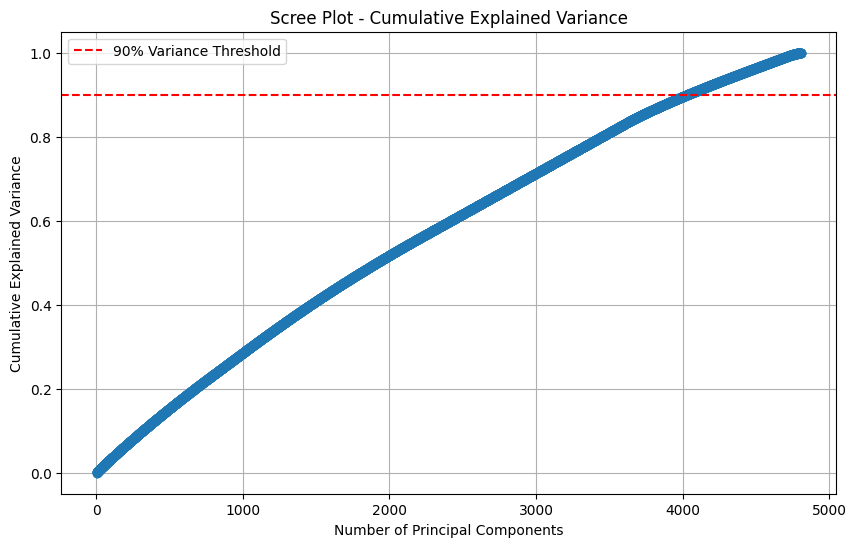

Selected Number of Components: 4032


In [52]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Select number of components (retain enough for 90% variance)
n_components = np.argmax(explained_variance_ratio >= 0.90) + 1
print(f"Selected Number of Components: {n_components}")

# Reduce dimensions using selected number of components
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data_scaled)

3. Use any clustering algorithm to create clusters

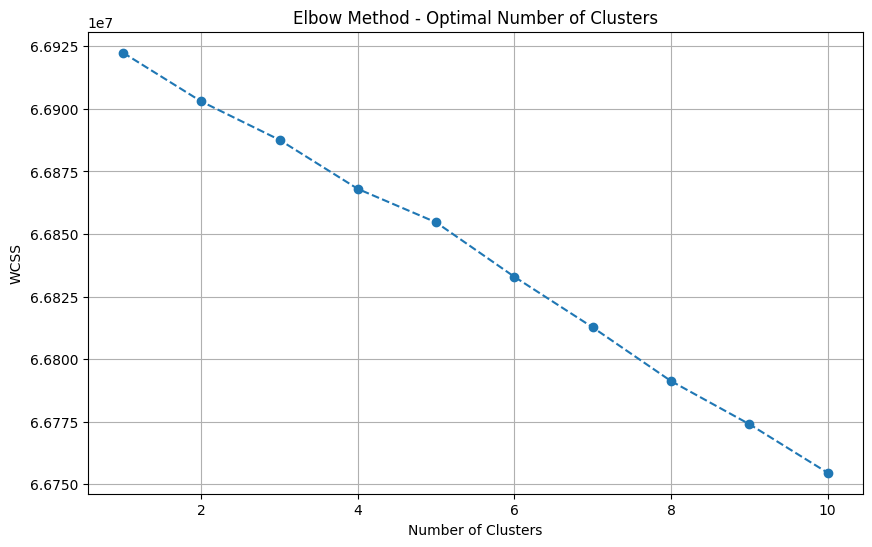

In [53]:
# Determine optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Choose k=3 (based on the elbow plot, assuming it flattens around 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Add cluster labels to the filtered dataframe
df_filtered['Cluster'] = clusters

4. Profile each cluster that you have generated based on your experiments


Cluster Profiles:

==================== Cluster 0 ====================

       show_id   type                                title  \
count        1      1                                    1   
unique       1      1                                    1   
top      s1801  Movie  Dolly Kitty Aur Woh Chamakte Sitare   
freq         1      1                                    1   
mean       NaN    NaN                                  NaN   
std        NaN    NaN                                  NaN   
min        NaN    NaN                                  NaN   
25%        NaN    NaN                                  NaN   
50%        NaN    NaN                                  NaN   
75%        NaN    NaN                                  NaN   
max        NaN    NaN                                  NaN   

                     director  \
count                       1   
unique                      1   
top     Alankrita Shrivastava   
freq                        1   
mean             

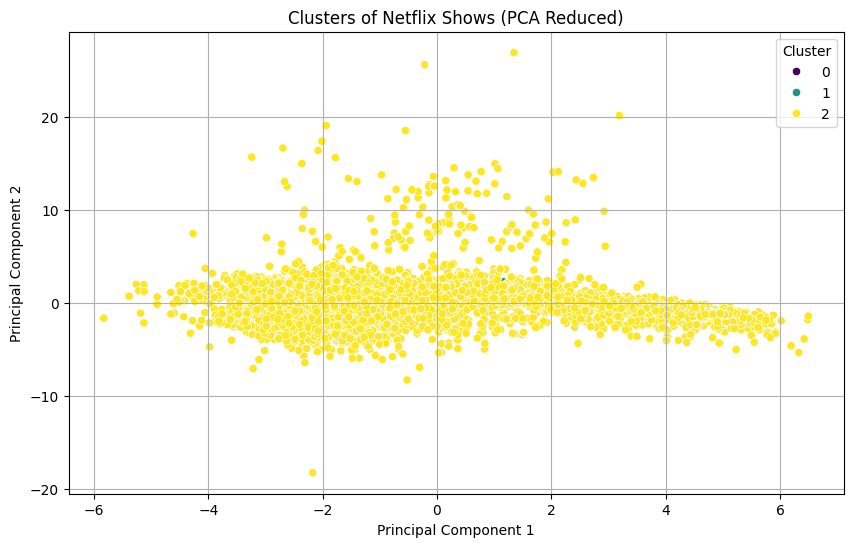

In [55]:
print("\nCluster Profiles:")

for cluster_id in range(optimal_k):
    print(f"\n{'=' * 20} Cluster {cluster_id} {'=' * 20}\n")
    cluster_data = df_filtered[df_filtered['Cluster'] == cluster_id]
    profile = cluster_data.describe(include='all')
    print(profile)

# Plot the clusters using the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters of Netflix Shows (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()